# AI Algorithm
> ### Clustering
> - 각 음식들의 정보를 바탕으로 카테고리를 만들어낸다

> ### Recommendation
> - 대략 2주간의 식단표를 이용해 다음 날짜의 추천 카테고리를 예측한다

> ### Combine
> - recommendation으로 선택된 카테고리의 음식들 중 선호도, 알러지 반응등에 대해 가중치를 매긴 후, 랜덤으로 하나를 선택해 다음 식단으로 추천한다

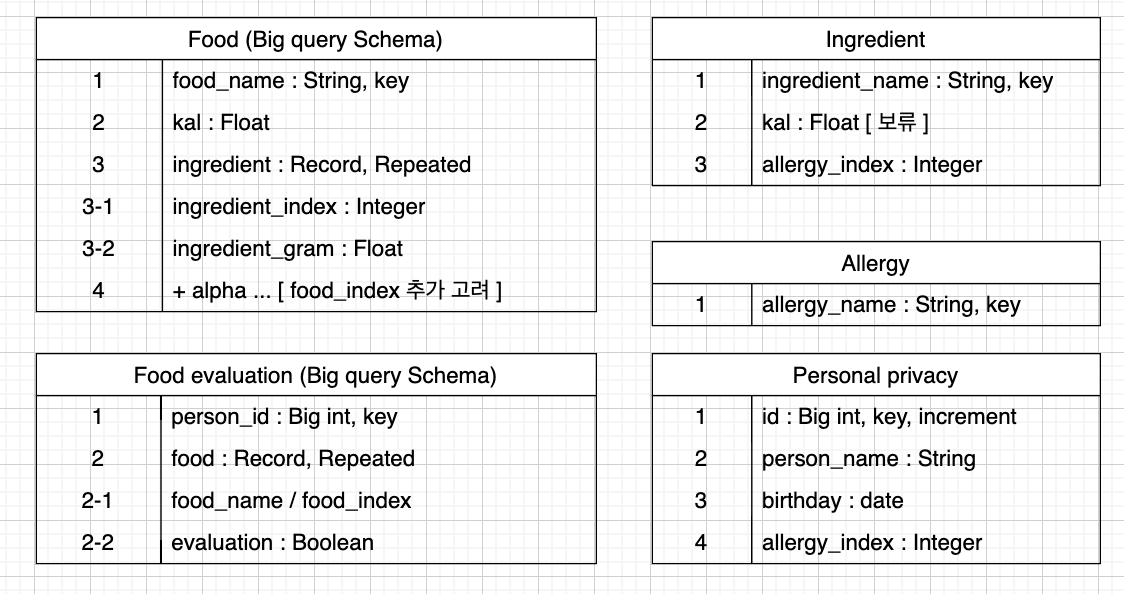

In [1]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./changed_dataset.csv")
data

,food_name,kal,0,1,2,3,4,5,6,7,...,176,177,178,179,180,181,182,183,184,185
0,감자미음,40.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,고구마미음,47.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,브로콜리미음,39.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,사과미음,47.46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,쌀미음,52.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,사과치즈진밥,168.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,명태당근진밥,140.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,감자사과메시,57.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,달걀노른자죽,137.40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
training_data_set = data.iloc[:,1:]
training_data_set

,kal,0,1,2,3,4,5,6,7,8,...,176,177,178,179,180,181,182,183,184,185
0,40.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,168.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,140.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,57.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,137.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Clustering
> ### K-Means Example

In [4]:
# K-means 알고리즘으로 data셋의 카테고리를 분류
# cluster의 수를 10으로 선택해서, 10개의 카테고리를 생성
km = KMeans(init='k-means++', n_clusters=10)
km.fit(training_data_set)

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [5]:
# 각 카테고리의 중심과 가장 가까이 있는 인덱스를 찾아낸다
result = []

for center in km.cluster_centers_:
    min_idx = 0
    min_dist = float('inf')
    for row in range(len(training_data_set)):
        r = np.array(training_data_set.iloc[row, :])
        current_dist = euclidean(r, center)
        if current_dist < min_dist:
            min_idx = row
            min_dist = current_dist
            
    result.append(min_idx)      

result.sort()
print(result)

[10, 21, 25, 83, 88, 97, 123, 126, 131, 141]


In [6]:
# 학습된 k-mean model을 통해 각 데이터셋이 어떤 카테고리로 분류되었는지 확인
each_category = km.predict(training_data_set)

category = pd.DataFrame({"category" : each_category})
category

,category
0,3
1,3
2,3
3,3
4,8
...,...
143,7
144,5
145,8
146,5


In [7]:
# 원본 데이터셋에 카테고리를 추가
data.join(category)

,food_name,kal,0,1,2,3,4,5,6,7,...,177,178,179,180,181,182,183,184,185,category
0,감자미음,40.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,고구마미음,47.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,브로콜리미음,39.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,사과미음,47.46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,쌀미음,52.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,사과치즈진밥,168.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
144,명태당근진밥,140.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
145,감자사과메시,57.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
146,달걀노른자죽,137.40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5


# Recomendation
> LSTM Example [미완]

In [14]:
from tensorflow import keras
from keras import layers, Model
from sklearn.model_selection import train_test_split

In [19]:
x_data = training_data_set
y_data = category

# 추후 stratify를 설정해준다
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33)